In [1]:
# VGG-16 Code for Final Project IE 590
# Keras implementation of VGG16
# Kristiaan Hector

# First we need to import the appropriate libraries
#--------------------------------------------------------------------------------------------------
# This ensures compatibility
# import tensorflow.python.keras import backend as K
import tensorflow.keras 

# Import libraries for reading and processing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Import the VGG-16 model from keras
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input

# import numpy
import numpy as np
#--------------------------------------------------------------------------------------------------

In [2]:
# Next, we need to define a few important things

DATASET_PATH  = './weed_data'                                       # set the path to the data set
IMAGE_SIZE    =  (300,300)                                            # set the image size
NUM_CLASSES   = 4                                                     # we have 4 different classes 
BATCH_SIZE    = 8                                                 # set the batch size
NUM_EPOCHS    = 30                                                    # set the number of epochs
WEIGHTS_FINAL = 'model-vgg16-final.h5'                                # save weights after training


In [ ]:
# Now we need to create our training and validation batches

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# define the training data
train_batches = train_datagen.flow_from_directory(DATASET_PATH+'/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)
                                                  
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# now define the validation data
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH+'/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

In [ ]:
# Next we want to show the classes
print('****************')
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx,cls))
print('****************')

#--------------------------------------------------------------------------------------------------

In [ ]:
# Next, let's set up the VGG16 model
model = VGG16(weights=None,
              input_tensor=None,
              input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
              pooling='max',
              classes=NUM_CLASSES)

In [ ]:
# Next, ensure that all of the layers in our model are trainable
for layer in model.layers:
    layer.trainable = True

In [ ]:
# After this, set up the optimizer for the model
# Here, I chose to use Adam...
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Make a usable summary of the model
print(model.summary())

In [ ]:
# Here, let's train the model
hist = model.fit_generator(train_batches,
                    steps_per_epoch = train_batches.samples // BATCH_SIZE,
                    validation_data = valid_batches,
                    validation_steps = valid_batches.samples //BATCH_SIZE,
                    epochs = NUM_EPOCHS)

In [ ]:
import matplotlib.pyplot as plt
N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [3]:
# Now let's add some data augmentation to our images to see if we can combat this overfitting
# problem...

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# define the training data
train_batches = train_datagen.flow_from_directory(DATASET_PATH+'/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)
                                                  
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# now define the validation data
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH+'/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 270 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


In [4]:
# create a new VGG model
# vgg16 model set up
model2 = VGG16(weights=None,
              input_tensor=None,
              input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
              pooling='max',
              classes=NUM_CLASSES)

In [5]:
# Next, we need to ensure that all of the layers in our model are trainable
for layer in model2.layers:
    layer.trainable = True

In [6]:
# Now we need to set up the optimizer for the model
# Let's use Adam...
model2.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
# Make a usable summary of our model's training and validation
print(model2.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [7]:
# Finally, let's train the model
hist2 = model2.fit_generator(train_batches,
                     steps_per_epoch = train_batches.samples // BATCH_SIZE,
                     validation_data = valid_batches,
                     validation_steps = valid_batches.samples //BATCH_SIZE,
                     epochs = NUM_EPOCHS)

Epoch 1/30
33/33 [==============================] - 30s 904ms/step - loss: 1.4356 - accuracy: 0.2939 - val_loss: 1.3114 - val_accuracy: 0.3864
Epoch 2/30
33/33 [==============================] - 25s 771ms/step - loss: 1.3299 - accuracy: 0.4046 - val_loss: 1.2607 - val_accuracy: 0.3864
Epoch 3/30
33/33 [==============================] - 26s 798ms/step - loss: 1.2769 - accuracy: 0.3969 - val_loss: 1.0994 - val_accuracy: 0.5568
Epoch 4/30
33/33 [==============================] - 26s 780ms/step - loss: 1.1098 - accuracy: 0.5379 - val_loss: 0.8760 - val_accuracy: 0.6705
Epoch 5/30
33/33 [==============================] - 26s 801ms/step - loss: 1.0361 - accuracy: 0.5611 - val_loss: 0.7054 - val_accuracy: 0.7614
Epoch 6/30
33/33 [==============================] - 26s 786ms/step - loss: 0.9992 - accuracy: 0.6038 - val_loss: 0.7777 - val_accuracy: 0.6705
Epoch 7/30
33/33 [==============================] - 26s 788ms/step - loss: 0.8461 - accuracy: 0.6908 - val_loss: 0.6765 - val_accuracy: 0.7273

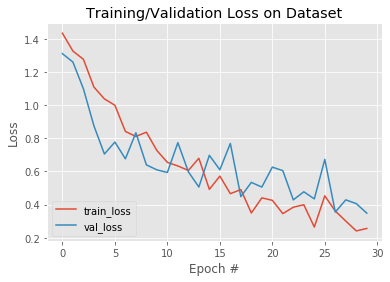

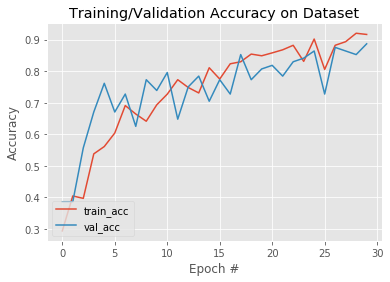

In [9]:
import matplotlib.pyplot as plt
N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist2.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist2.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [12]:
# Now we need to test!!!

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=1)

out = model2.evaluate_generator(test_batches, use_multiprocessing=True)
print(list(zip(model2.metrics_names,out)))

Found 88 images belonging to 4 classes.
[('loss', 0.3846859431215638), ('accuracy', 0.8863636)]


In [13]:
test_batches.reset()
Y_pred = model2.predict_generator(test_batches, use_multiprocessing=True)
# print(len(Y_pred))



 Classification Report

              precision    recall  f1-score   support

   cocklebur       0.73      0.94      0.82        17
     foxtail       1.00      0.86      0.92        14
     pigweed       0.97      0.97      0.97        34
     ragweed       0.85      0.74      0.79        23

    accuracy                           0.89        88
   macro avg       0.89      0.88      0.88        88
weighted avg       0.90      0.89      0.89        88



Confusion Matrix



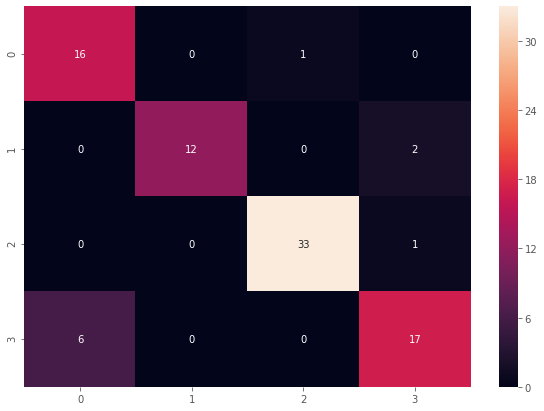

In [14]:
# for plots et al.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = np.argmax(Y_pred, axis=1)

print('\n\n Classification Report\n')
target_names = list(test_batches.class_indices.keys())
print(classification_report(list(test_batches.classes), y_pred, target_names=target_names))


print('\n\nConfusion Matrix\n')
cm = confusion_matrix(test_batches.classes, y_pred)

# row_sums = cm.sum(axis=1)
# new_matrix = a / row_sums[:, numpy.newaxis]

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [16]:
# save trained weights
model2.save(WEIGHTS_FINAL)